# An Examination of Factors in Used Car Pricing
### What drives the price of a car?

![](images/ckurt.jpeg)

**OVERVIEW**

In this application, the client is a used car dealership looking to maximize sales. Using a dataset on used cars and machine learning, factors that make a car more or less expensive are identified.  As a result of this analysis, clear recommendations to the client, a used car dealership, is provided as to what consumers value in a used car.

The dealership needs a clear set of recommendations on the key features that drive used car pricing, enabling them to fine-tune their purchasing decisions and maintain inventory aligned with consumer preference. Using a dataset on used cars, statistical and machine learning models are used to determine which features contribute most to a car’s resale value.

## Executive Summary

Machine learning techniques were used to determine which features contribute most to a car’s resale value. 
The dealership group's market positioning and business constraints were considered in the evaluation: 
* The dealer is not interested in keeping cars of extremely high value  (over $100,000) on the lot 
* The dealer prefers  to sell cars under 1,000,000 miles to avoid time consuming questions during the sales cycle
* The dealer is not equipped to sell non-mass market cars such as those that are very old (25 years) or very rare

Various computer models were evaluated based on their ability to accurately  predict the price of the car. Data up to the year 2020 was used to evaluate the models. The selected model provided the following insight into what drives the price of a car. 

**Top Factors That Drove High Prices**
* Fuel: Diesel
* Type: Truck
* Cylinders: 8 Cylinders
* Drive: 4wd
* Manufacturer: Toyota
* Type: Pickup
* Transmission: Manual
* Title: Status: Clean
* Manufacturer: Ram
* Recent Model Year
* Manufacturer: GMC
* State: CA
* Manufacturer: Honda
* Type: Convertible
* State: NC
* Type: Coupe
* Cylinders: 6 Cylinders
* Manufacturer: Lexus
* Condition: Like New
* Cylinders: 10 Cylinders

**Top Factors that Drive Low Prices**
* Fuel: Gas
* Cylinders: 4 Cylinders
* Type: Sedan
* Drive: Fwd
* Type: SUV
* Manufacturer: Nissan
* Transmission: Automatic
* Type: Hatchback
* Manufacturer: Dodge
* Manufacturer: Subaru
* Title: Status: Rebuilt


The complete list of sorted factors in priority order is available for download here: 
<a href="factors_that_drive_price_sorted.csv">factors_that_drive_price_sorted.csv</a>

**Action Items and Next Steps**
1. The dealer should review the sorted factors list and purchase cars with these attributes. 
2. As the recommendations are only as good as the data used, dealer group to continuously  provide updated sales data for re-evaluation. 

## Methodology: CRISP-DM Framework
For this application, an industry standard model called CRISP-DM is used.  This process provides a framework for working through a data problem.  



<center>
    <img src = images/crisp.png width = 50%/>
</center>

<center>
    <img src = images/CRISP-DM-Methodology.png width = 80%/>
</center>




## Business Understanding

The client is a used car dealership looking to maximize sales. They need a clear set of recommendations on the key features that drive used car pricing, enabling them to fine-tune their purchasing decisions and maintain inventory aligned with consumer preference. Using a dataset on used cars, statistical and machine learning models are used to determine which features contribute most to a car’s resale value.

## Data Understanding


To understand data  and quality of the used car dataset, the following steps will be performed:
1. Collect Initial Data - Load Data
2. Describe Data - Understand Fields
3. Explore Data - Understand data values
4. Understand Data Quality - Perform Statistical Analysis - Outliers, Completeness of Data

This information  will be used to guide the Business Understanding. 

#### 1. Collect Initial Data - Load Data

In [854]:
from sklearn import linear_model
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import math as math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns


In [855]:
# Read Data

data = pd.read_csv('data/vehicles.csv')


#### 2. Describe Data - Understand Fields

In [856]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [857]:
#Perform Initial Data Clean-up derived from the subsequent Data Preparation Section

#Clean Data Criteria for Price and Odometer
nom_data = data.query('100 < price < 100000 and 10 < odometer < 1000000')
#Remove Incomplete Data
nom_data = nom_data.dropna()
#Remove Irrelevant Data: VIN, id
nom_data = nom_data.drop('VIN', axis=1)
nom_data = nom_data.drop('id', axis=1)

nom_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 31631 entries, 215 to 426833
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        31631 non-null  object 
 1   price         31631 non-null  int64  
 2   year          31631 non-null  float64
 3   manufacturer  31631 non-null  object 
 4   model         31631 non-null  object 
 5   condition     31631 non-null  object 
 6   cylinders     31631 non-null  object 
 7   fuel          31631 non-null  object 
 8   odometer      31631 non-null  float64
 9   title_status  31631 non-null  object 
 10  transmission  31631 non-null  object 
 11  drive         31631 non-null  object 
 12  size          31631 non-null  object 
 13  type          31631 non-null  object 
 14  paint_color   31631 non-null  object 
 15  state         31631 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 4.1+ MB


#### 3. Explore Data - Understand data values
Perform a series of plots to understand the data and intuitively see if there are any correlations to the target price feature. 

* For categorical data, there appears to be a significant influence on price for some categorizations. 
* For numeric data such as odometer miles and year, there appears to be a messy but roughly linear relationship. 

##### Numeric Data

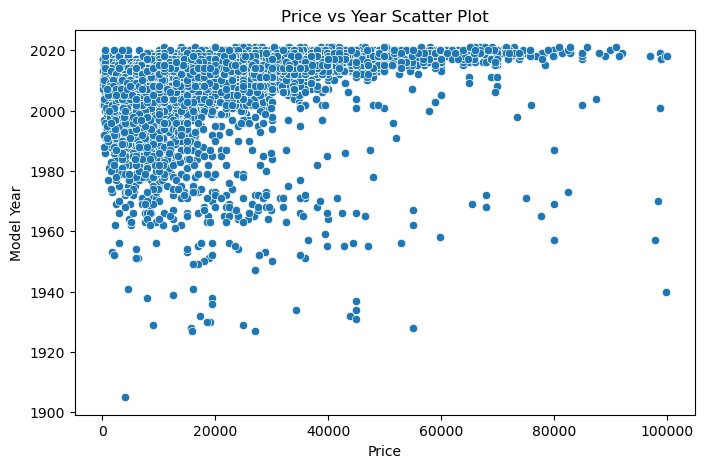

In [858]:
#Price vs Year Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=nom_data, x="price", y="year")

# Adding labels and title
plt.xlabel("Price")
plt.ylabel("Model Year")
plt.title("Price vs Year Scatter Plot")

# Show the plot
plt.show()

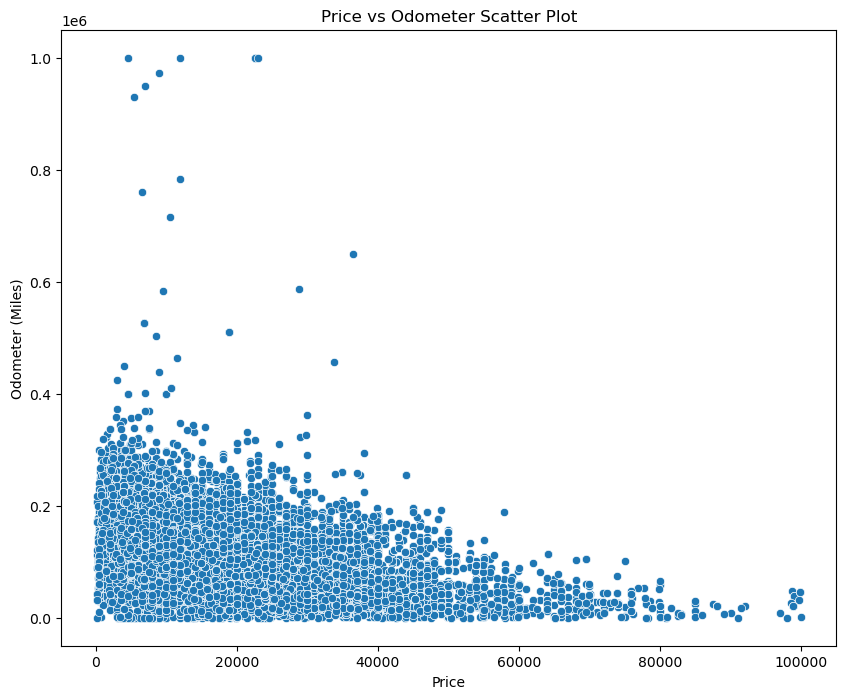

In [859]:
#Price vs Odometer Scatter Plot

# Create scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=nom_data, x="price", y="odometer")

# Adding labels and title
plt.xlabel("Price")
plt.ylabel("Odometer (Miles)")
plt.title("Price vs Odometer Scatter Plot")

# Show the plot
plt.show()

##### Categorical Data

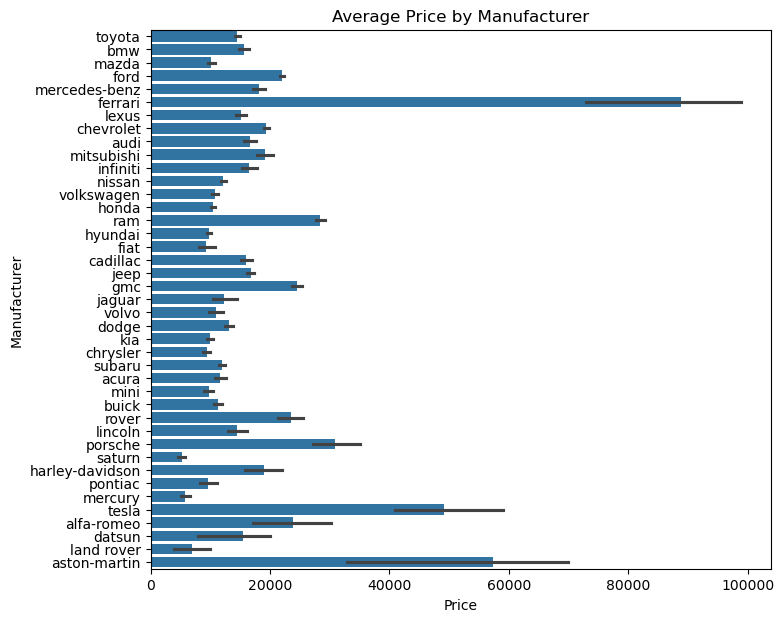

In [860]:
#Average Price by Manufacturer

# Create bar plot
plt.figure(figsize=(8, 7))
sns.barplot(data=nom_data, x="price", y="manufacturer")

# Adding labels and title
plt.xlabel("Price")
plt.ylabel("Manufacturer")
plt.title("Average Price by Manufacturer")

# Show the plot
plt.show()

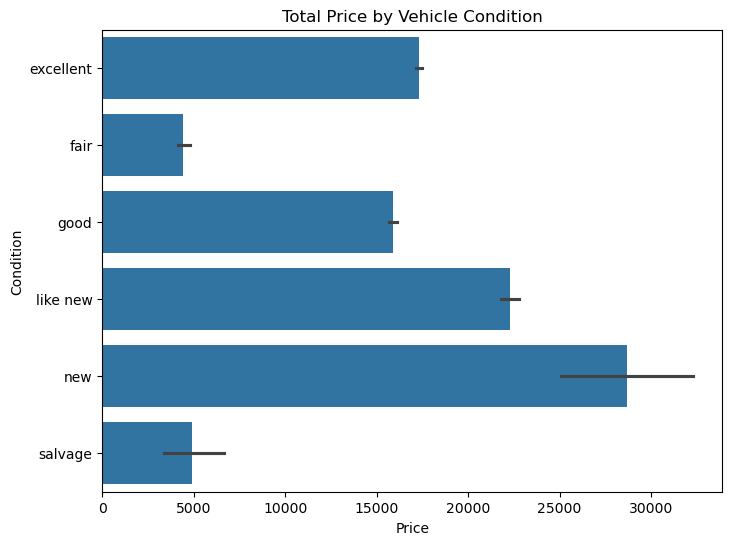

In [861]:
#Total Price by Vehicle Condition

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=nom_data, x="price", y="condition")

# Adding labels and title
plt.xlabel("Price")
plt.ylabel("Condition")
plt.title("Total Price by Vehicle Condition")

# Show the plot
plt.show()

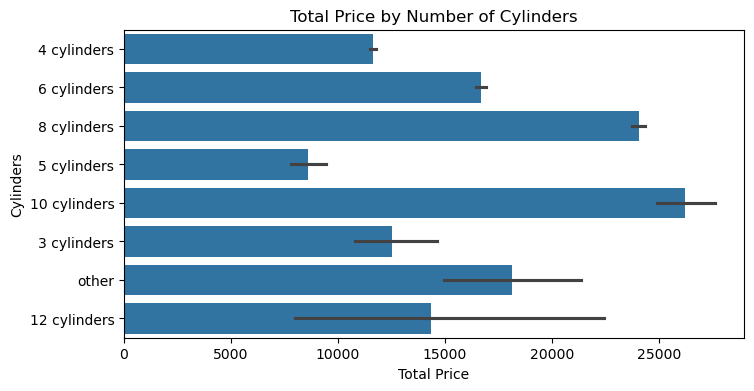

In [862]:
#Total Price by Number of Cylinder  

# Create bar plot
plt.figure(figsize=(8, 4))
sns.barplot(data=nom_data, x="price", y="cylinders")

# Adding labels and title
plt.xlabel("Total Price")
plt.ylabel("Cylinders")
plt.title("Total Price by Number of Cylinders")

# Show the plot
plt.show()

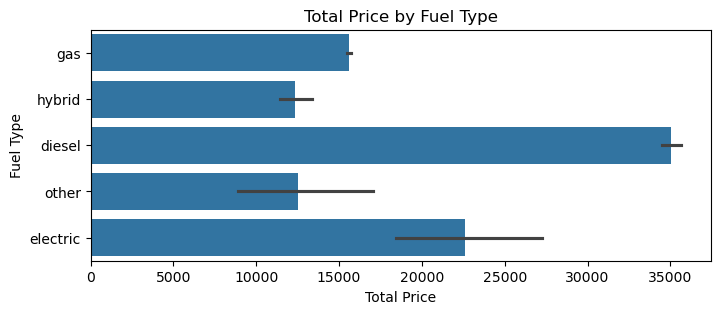

In [863]:
#Total Price by Fuel Type

# Create bar plot
plt.figure(figsize=(8, 3))
sns.barplot(data=nom_data, x="price", y="fuel")

# Adding labels and title
plt.xlabel("Total Price")
plt.ylabel("Fuel Type")
plt.title("Total Price by Fuel Type")

# Show the plot
plt.show()

<Axes: xlabel='price', ylabel='title_status'>

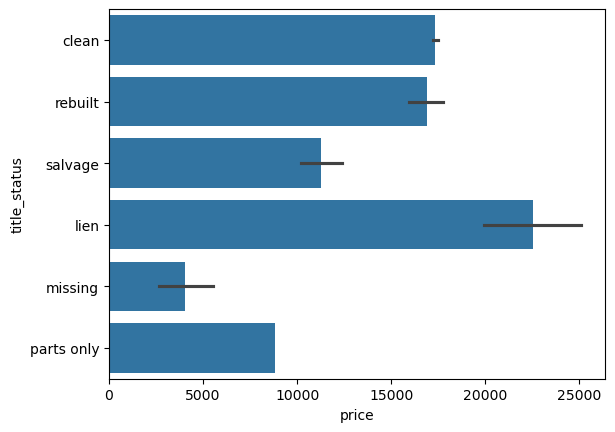

In [864]:
sns.barplot(data=nom_data, x="price", y="title_status")

<Axes: xlabel='price', ylabel='transmission'>

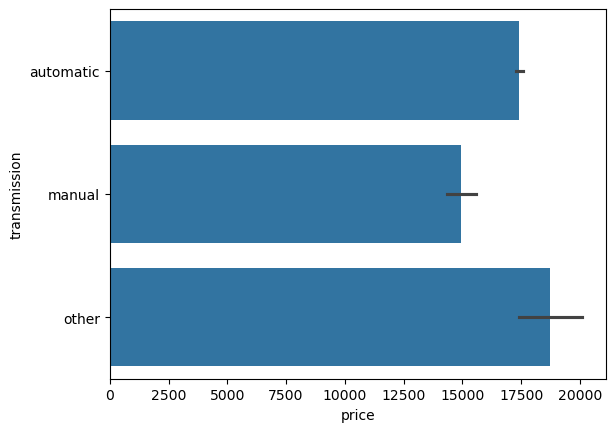

In [865]:
sns.barplot(data=nom_data, x="price", y="transmission")

<Axes: xlabel='price', ylabel='drive'>

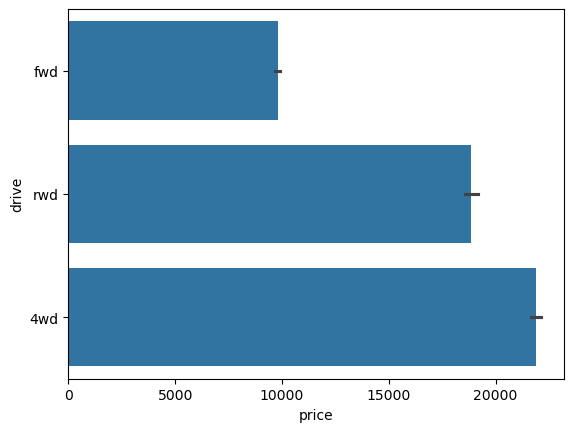

In [866]:
sns.barplot(data=nom_data, x="price", y="drive")

<Axes: xlabel='price', ylabel='size'>

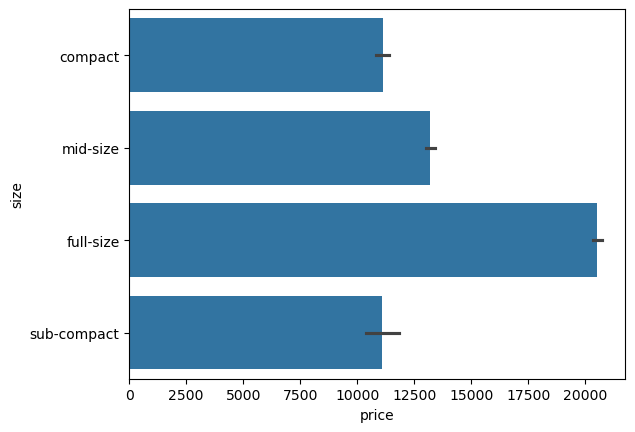

In [867]:
sns.barplot(data=nom_data, x="price", y="size")

<Axes: xlabel='price', ylabel='type'>

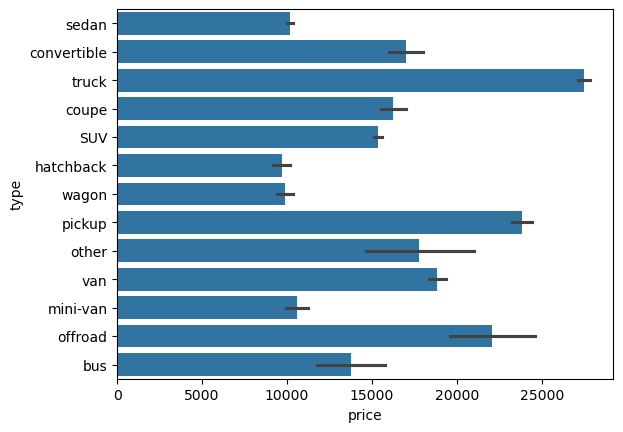

In [868]:
sns.barplot(data=nom_data, x="price", y="type")

<Axes: xlabel='price', ylabel='paint_color'>

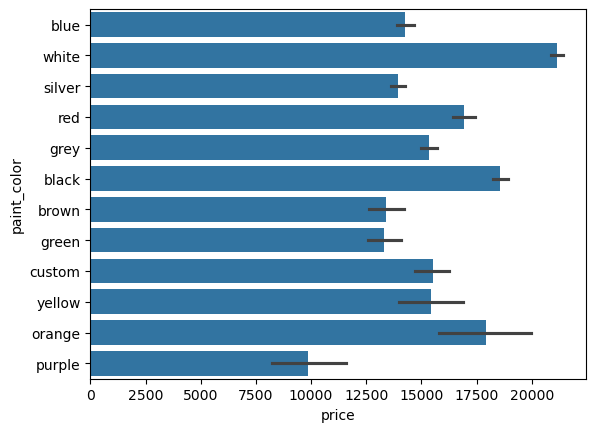

In [869]:
sns.barplot(data=nom_data, x="price", y="paint_color")

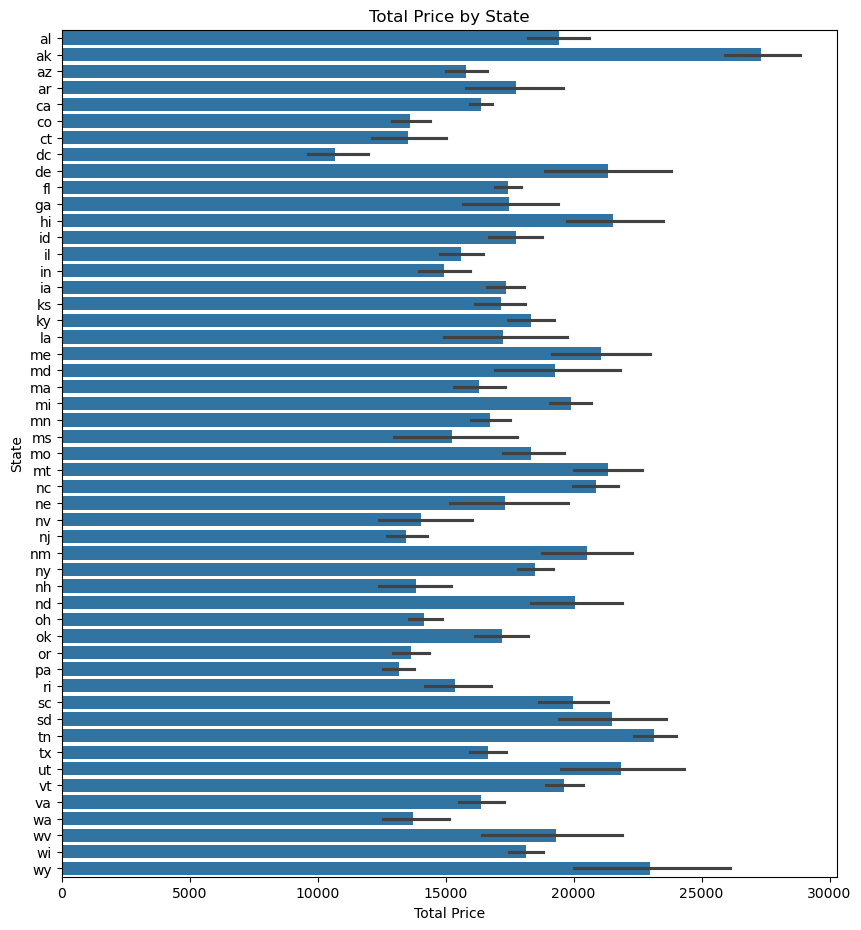

In [870]:
#Total Price by State

# Create bar plot
plt.figure(figsize=(10, 11))
sns.barplot(data=nom_data, x="price", y="state")

# Adding labels and title
plt.xlabel("Total Price")
plt.ylabel("State")
plt.title("Total Price by State")

# Show the plot
plt.show()

In [871]:
#Understand the distribution of cars by state
nom_data.value_counts('state').head(20)

state
ca    3281
fl    2697
ny    1719
tx    1288
mi    1221
wi    1108
nc    1088
oh    1032
ia    1025
pa     996
or     982
va     976
tn     857
mn     792
nj     788
co     753
vt     676
ma     652
il     631
id     602
Name: count, dtype: int64

In [872]:
#Understand the distribution of cars by region

nom_data.value_counts('region').head(10)

region
vermont                  676
jacksonville             477
anchorage / mat-su       397
nashville                360
louisville               359
central NJ               359
grand rapids             356
stockton                 345
minneapolis / st paul    338
madison                  332
Name: count, dtype: int64

#### 4. Understand Data Quality - Perform Statistical Analysis - Outliers, Completeness of Data

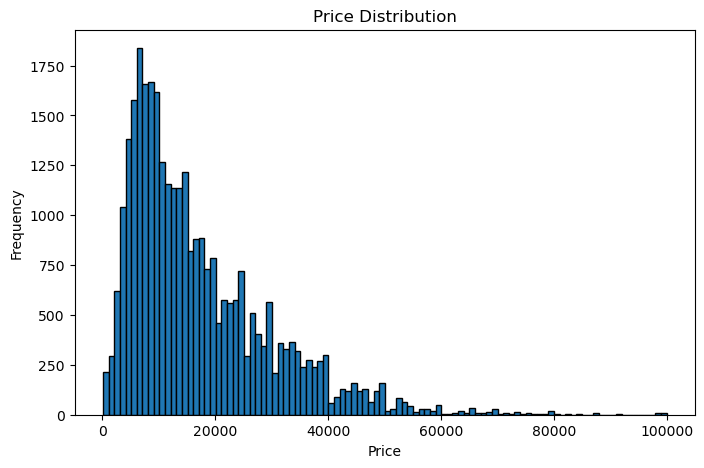

In [873]:
# Price Distribution
# Observe the frequency of price data

plt.figure(figsize=(8, 5))
plt.hist(nom_data["price"], bins=100, edgecolor='black')

# Adding labels and title
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price Distribution")

# Show the plot
plt.show()

In [874]:
nom_data.describe()

,price,year,odometer
count,31631.000000,31631.000000,31631.000000
mean,17302.622364,2010.851254,109411.039329
std,12850.029588,7.236546,58865.484929
min,116.000000,1905.000000,11.000000
25%,7956.000000,2008.000000,70125.000000
50%,13850.000000,2012.000000,107168.000000
75%,23900.000000,2015.000000,144000.000000
max,99990.000000,2021.000000,999999.000000


## Data Preparation

To obtain a usable machine learning dataset, outliers that are irrelevant to business or records with missing data are removed. 

The following steps are followed:

1. Select Test Data - Identify features and business relevant data ranges
2. Clean Data - Perform data clean up and report

Note: The Data Preparation steps of Construct Data, Integrate Data, and Format data are not required due to the high quality data set. 


#### 1. Select Test Data - Identify features and business relevant data ranges

Determine clean data criteria based on business needs.

**Clean Data Criteria: Price Between $100 and $100,000**

The dealer is only interested in cars that were sold at market value so free cars were eliminated from the list. A threshold is set at $100 to represent a market value used car transaction. Data falling out of the threshold is eliminated. The dealer is also not interested in keeping cars of extremely high value on the lot so limits the price of cars to $100,000.

**Clean Data Criteria: Odometer Reading Between 10 and 1,000,000**

The dealer does not wish to sell extremely high mileage cars as there are too many questions from customers during the sales process about high mileage car's reliability. As such cars over 1,000,000 miles are excluded from the dataset. 

**Clean Data Criteria: Remove Outliers for Numeric Data**

Since outliers affect the model quality and occur infrequently, records with outliers are removed. 

**Clean Data Criteria: Cars No Older than 25 years**

The dealer is not interested in selling cars that are very old or rare. 

**Clean Data: Manufacture Models**

Models are manufacturer specific so concatenate Make and Model for the model feature. 

**Irrelevant Data: VIN**

As the VIN number is irrelevant to the machine learning model as it is not a feature and just an identifier. VINs are inherently a unique identifier and thus not relevant to machine learning training. 

**Incomplete Data**

Data records with missing records are removed. 

#### 2. Clean Data - Perform data clean up and report

After data clean up, 30,025 records and 16 features are available in the clean dataset. 



In [875]:
# Data Preparation

data = pd.read_csv('data/vehicles.csv')


#Clean Data Criteria for Price and Odometer
nom_data = data.query('100 < price < 100000 and 10 < odometer < 1000000')

#Remove outliers in price, odometer, and year
q_low = nom_data["price"].quantile(0.01)
q_hi  = nom_data["price"].quantile(0.99)
nom_data = nom_data[(nom_data["price"] < q_hi) & (nom_data["price"] > q_low)]
q_low = nom_data["odometer"].quantile(0.01)
q_hi  = nom_data["odometer"].quantile(0.99)
nom_data = nom_data[(nom_data["odometer"] < q_hi) & (nom_data["odometer"] > q_low)]
q_low = nom_data["year"].quantile(0.01)
q_hi  = nom_data["year"].quantile(0.99)
nom_data = nom_data[(nom_data["year"] < q_hi) & (nom_data["year"] > q_low)]

#Remove very old cars
nom_data = nom_data[nom_data["year"] > max(nom_data["year"])-25]

#Concatenate Make and Model for Model
nom_data['model'] = nom_data['manufacturer'] + " - " + nom_data['model'].astype(str)

#Remove Incomplete Data
nom_data.replace('', np.nan, inplace=True)
nom_data = nom_data.dropna()

#Remove Irrelevant Data: VIN, id
nom_data = nom_data.drop('VIN', axis=1)
nom_data = nom_data.drop('id', axis=1)

nom_data.to_csv('clean_data.csv', index=False)

nom_data

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
215,birmingham,4000,2002.0,toyota,toyota - echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al
219,birmingham,2500,1995.0,bmw,bmw - 525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al
268,birmingham,9000,2008.0,mazda,mazda - miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,rwd,compact,convertible,white,al
337,birmingham,8950,2011.0,ford,ford - f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
355,birmingham,9400,2008.0,mercedes-benz,mercedes-benz - benz c350,good,6 cylinders,gas,129473.0,clean,automatic,rwd,full-size,sedan,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426785,wyoming,23495,2015.0,ford,ford - f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,4wd,full-size,truck,black,wy
426788,wyoming,12995,2016.0,chevrolet,chevrolet - cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy
426792,wyoming,32999,2014.0,ford,"ford - f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy
426793,wyoming,15999,2018.0,chevrolet,"chevrolet - cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black,wy


## Modeling

With the sales price as the target, different regression models will be evaluated. As part of the models, different parameters will be explored and the findings will be cross-validated. 

1. Select Modeling Technique - Identify 

2. Generate Test Design - Split Test and Training Data

3. Build Model

4. Assess Model

The evaluation metric, Root Mean Squared Error (RMSE), of tested models is used to compared and cross-validated to assess and select a model. In this case, the selected model is One Hot Encoding of categorical features with linear regression for numeric features. 


### 1. Select Modeling Technique 

Various categorial and numeric techniques will be evaluated. Linear Regression, Poly Regression, Ridge, Lasso, One Hot Encoding and combinations thereof will be evaluated. 


In [876]:
#Build Cross Validation Table to compare RMSE of different models
modeling_cross_validation = pd.DataFrame(columns=["Model Name", "Training Root Mean Squared Error", "Dev Test Root Mean Squared Error"])

modeling_cross_validation

,Model Name,Training Root Mean Squared Error,Dev Test Root Mean Squared Error


### 2. Generate Test Design - Split Test and Training Data

The overall cleaned dataset will be split into a Training dataset used for training the models, and Dev Test dataset used to validate the model.  Twenty-five percent of the dataset will be used tor Dev Test, and the remaining 75% will be used for training. 

In [877]:
#Polynomial Regression of Two Numerical Features - Grid Search CV and Cross Validation

numerical_features = ['odometer', 'year']
 
pipeline = Pipeline([
    ('poly', PolynomialFeatures( include_bias = False)),
    ('regressor', LinearRegression(fit_intercept = True))
])

parameters_to_try = {'poly__degree':[ 1, 2, 3, 4, 5, 6]}

model_finder = GridSearchCV(estimator = pipeline,
                            param_grid = parameters_to_try,
                            scoring = "neg_mean_squared_error")

model_finder.fit(X_train[numerical_features],y_train)
print ("Model Best Params:")
print (model_finder.best_params_)
print ("Model Best RMSE Error: ")
print(math.sqrt(-model_finder.best_score_))

best_model = model_finder.best_estimator_

train_preds =  best_model.predict(X_train[numerical_features])
mse_train =  mean_squared_error (train_preds,y_train)
print ("Root Absolute Error Training Data Set Best model:")
print (math.sqrt(mse_test))

test_preds = best_model.predict(X_test[numerical_features])
mse_test = mean_squared_error (test_preds,y_test)
print ("Root Absolute Error Test Data Set Best model:")
print (math.sqrt(mse_test))

Model Best Params:
{'poly__degree': 3}
Model Best RMSE Error: 
9339.323082548144
Root Absolute Error Training Data Set Best model:
5697.257510133106
Root Absolute Error Test Data Set Best model:
9370.3110268411


In [878]:
#Generate Test Design
# Split Test and Train
X = nom_data.drop('price', axis=1)
y = nom_data['price'] 
  

# using the train test split function 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True)



### 3. Build Model
Several models will be built. The RMSE - Root Mean Squared Error, which is effectively an average of the error, will be used to assess each model. Training and Test errors will be recorded. Grid Search will be used to tune hyperparameters and perform the cross-validation. 


#### Model 1: Linear Regression of two numeric features

A simple linear model consisting of Odometer and Year, the two numeric features, is considered as a baseline.  

In [879]:
#Two Feature Linear Regression with Price, Odometer and Year

X_train_two_feature = X_train[["year", "odometer"]].copy()

two_feature_LR = linear_model.LinearRegression(fit_intercept = True)
two_feature_LR.fit(X_train_two_feature, y_train)


#Training Error
preds_train = two_feature_LR.predict (X_train_two_feature)
train_mse = mean_squared_error (preds_train,y_train)
print("Average Error for Training Data (RMSE): ")
print( math.sqrt(train_mse))

preds_test = two_feature_LR.predict (X_test[["year", "odometer"]])
test_mse = mean_squared_error (preds_test, y_test)
print("Average Error for Test Data (RMSE): ")
print( math.sqrt(test_mse))

#Add Result to Master CV table
modeling_cross_validation.loc[len(modeling_cross_validation)] = ["Linear Regression - 2 numeric features", math.sqrt(train_mse), math.sqrt(test_mse)]
modeling_cross_validation


Average Error for Training Data (RMSE): 
9734.4960503504
Average Error for Test Data (RMSE): 
9776.02024227232


,Model Name,Training Root Mean Squared Error,Dev Test Root Mean Squared Error
0,Linear Regression - 2 numeric features,9734.49605,9776.020242


##### Visualizations for Model 1

In [880]:

#Prepare Training and Predicted Data for Plotting
train_preds_plot = X_train_two_feature.copy()
train_preds_plot["price"] = y_train
train_preds_plot["train_preds"] = preds_train



**Plot Training Data**

In [881]:
#Plot Training Data
px.scatter_3d(train_preds_plot, x = "odometer", y = "year", z = "price")

**Plot Predicted Data from Linear Regression**

In [882]:
#Plot Predicted Data from Linear Regression

px.scatter_3d(train_preds_plot, x = "odometer", y = "year", z = "train_preds")

**Plot Test Predictions**

In [883]:
test_preds_plot = X_test[["year", "odometer"]].copy()
test_preds_plot["price"] = y_test
test_preds_plot["test_preds"] = preds_test

px.scatter_3d(test_preds_plot, x = "odometer", y = "year", z = "price")

**Plot Test Preds**

In [884]:


px.scatter_3d(test_preds_plot, x = "odometer", y = "year", z = "test_preds")

#### Model 2: Polynomial Regression of Two Numerical Features - Grid Search CV and Cross Validation
A polynomial regression model of the 2 numerical features of odometer and year is considered. To obtain the best hyperparameter for the polynomial order, GridSearchCV is used to quickly evaluate several degrees.

In [885]:
#Polynomial Regression of Two Numerical Features - Grid Search CV and Cross Validation

numerical_features = ['odometer', 'year']
 
pipeline = Pipeline([
    ('poly', PolynomialFeatures( include_bias = False)),
    ('regressor', LinearRegression(fit_intercept = True))
])

parameters_to_try = {'poly__degree':[ 1, 2, 3, 4, 5, 6]}

model_finder = GridSearchCV(estimator = pipeline,
                            param_grid = parameters_to_try,
                            scoring = "neg_mean_squared_error")

model_finder.fit(X_train[numerical_features],y_train)
print ("Model Best Params:")
print (model_finder.best_params_)
print ("Model Best RMSE Error: ")
print(math.sqrt(-model_finder.best_score_))

best_model = model_finder.best_estimator_

train_preds =  best_model.predict(X_train[numerical_features])
mse_train =  mean_squared_error (train_preds,y_train)
print ("Root Absolute Error Training Data Set Best model:")
print (math.sqrt(mse_train))

test_preds = best_model.predict(X_test[numerical_features])
mse_test = mean_squared_error (test_preds,y_test)
print ("Root Absolute Error Test Data Set Best model:")
print (math.sqrt(mse_test))

#Add Result to Master CV table
modeling_cross_validation.loc[len(modeling_cross_validation)] = ["Polynomial Regre. - GridCV Search", math.sqrt(mse_train), math.sqrt(mse_test)]
modeling_cross_validation

Model Best Params:
{'poly__degree': 3}
Model Best RMSE Error: 
9339.323082548144
Root Absolute Error Training Data Set Best model:
9334.771188972709
Root Absolute Error Test Data Set Best model:
9370.3110268411


,Model Name,Training Root Mean Squared Error,Dev Test Root Mean Squared Error
0,Linear Regression - 2 numeric features,9734.496050,9776.020242
1,Polynomial Regre. - GridCV Search,9334.771189,9370.311027


#### Model 3: One Hot Encoding w/ Linear regression
A combination of One Hot Encoding of categorical values along with Linear Regression for numeric values is evaluated.  

In [886]:
#One Hot Linear Regression

categorical_features = ['manufacturer','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color','state']

numerical_features = ['odometer', 'year']


preprocessor = ColumnTransformer(
    transformers=[ 
        ('passthrough', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features),
    ], remainder='drop'
)

# Examine Encoded Transformed Data Frame
transformed_array = preprocessor.fit_transform(X_train)
num_feature_names = numerical_features
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = list(num_feature_names) + list(cat_feature_names)
transformed_df = pd.DataFrame(transformed_array.toarray(), columns = feature_names)

# Define pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression(fit_intercept = True))
])

#Train
pipeline.fit(X_train,y_train)
coefs = pipeline.named_steps['regressor'].coef_

#Predict
preds_train = pipeline.predict(X_train)

#Examine Training RMSE
mse = mean_squared_error(preds_train,y_train)
print ("Average Error Training Set:")
print (math.sqrt(mse))

#Examine Test RMSE
test_preds = pipeline.predict(X_test)
mse_test = mean_squared_error(y_test, test_preds)

print ("Average Error Test Set:")
print (math.sqrt(mse_test))

#Add Result to Master CV table
modeling_cross_validation.loc[len(modeling_cross_validation)] = ["One Hot Encoding - Categorical & Numeric", math.sqrt(mse), math.sqrt(mse_test)]
modeling_cross_validation


Average Error Training Set:
5702.579824894757
Average Error Test Set:
5697.257510133106


,Model Name,Training Root Mean Squared Error,Dev Test Root Mean Squared Error
0,Linear Regression - 2 numeric features,9734.496050,9776.020242
1,Polynomial Regre. - GridCV Search,9334.771189,9370.311027
2,One Hot Encoding - Categorical & Numeric,5702.579825,5697.257510


##### Examine Coefficients of Model 3
Examining the coefficients of this Linear Regression model which have the highest values give a strong sense of which features and their corresponding values contribute more to the price of the car. 

In [887]:
#Examine Coefficients
df_coefs = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
df_coefs_sorted = df_coefs.sort_values(by='Coefficient', ascending=False)
df_coefs_sorted.to_csv ("factors_that_drive_price_sorted.csv")
df_coefs_sorted.head(30)

,Feature,Coefficient
55,fuel_diesel,6273.272873
86,type_truck,4084.102136
53,cylinders_8 cylinders,2991.657939
69,drive_4wd,2272.776116
38,manufacturer_toyota,1694.477644
84,type_pickup,1188.536299
67,transmission_manual,1134.467203
60,title_status_clean,1129.079707
33,manufacturer_ram,1045.341042
1,year,929.080968


### 4. Assess Model
When cross validating the different models, the model utilizing One Hot Encoding of categorical features with linear regression for numeric features produced the lowest training and dev test results. This will be the model selected as the approved model

In [888]:
modeling_cross_validation

,Model Name,Training Root Mean Squared Error,Dev Test Root Mean Squared Error
0,Linear Regression - 2 numeric features,9734.496050,9776.020242
1,Polynomial Regre. - GridCV Search,9334.771189,9370.311027
2,One Hot Encoding - Categorical & Numeric,5702.579825,5697.257510


## Evaluation


The following models were compared:
* Model 1 - Linear Regression of Two Numeric Features
* Model 2 - Polynomial Regression of Two Numerical Features - Grid Search CV and Cross Validation
* Model 3 - One Hot Encoding w/ Linear regression - Numeric and Categorical Features

When comparing the models, an evaluation metric, in this case, Root Mean Squared Error, is sought to be minimized. By ensuring that not only the training MSE is minimized, and that also the cross validation Dev/Test dataset MSE is also minimized, we can validate that overfitting did not occur. 

In the models evaluated, Linear Regression produced a baseline MSE. Polynomial regression was used to achieve a tighter fit on the training data with GridSearchCV used to find the optimal hyper-parameter of degree which was found to be 3. Minimal gains in reducing the MSE was achieved in both training and dev/test data sets with Polynomial regression. 

As expected, a great improvement in the fit was achieved when categorical data was introduced via One Hot Encoding. This method, along with the two numeric factors when evaluated by Linear Regression, produced the best MSE. 

By examining the coefficients produced by this model, we can identify which factors (a data feature and corresponding value) contribute the most to a high sales price. Because of the binary nature of One Hot Encoding and that it gives equal weight to all of the categorical feature values, we can sort the coefficients table to identify which values add the greatest amount to the price. 

In this evaluation, these are the features that demand the highest prices:

* Fuel: Diesel
* Type: Truck
* Cylinders: 8 Cylinders
* Drive: 4wd
* Manufacturer: Toyota
* Type: Pickup
* Transmission: Manual
* Title: Status: Clean
* Manufacturer: Ram
* Manufacturer: GMC
* State: CA
* Manufacturer: Honda
* Type: Convertible
* State: NC
* Type: Coupe
* Cylinders: 6 Cylinders
* Manufacturer: Lexus
* Condition: Like New
* Cylinders: 10 Cylinders


To provide further value to the customer, the complete list of sorted factors in priority order is available for download here: 
<a href="factors_that_drive_price_sorted.csv">factors_that_drive_price_sorted.csv</a>

In [889]:
#Display Model Comparison
modeling_cross_validation

,Model Name,Training Root Mean Squared Error,Dev Test Root Mean Squared Error
0,Linear Regression - 2 numeric features,9734.496050,9776.020242
1,Polynomial Regre. - GridCV Search,9334.771189,9370.311027
2,One Hot Encoding - Categorical & Numeric,5702.579825,5697.257510


In [890]:
#Display Factors that Contribute to Used Car Pricing
df_coefs_sorted.head(30)

,Feature,Coefficient
55,fuel_diesel,6273.272873
86,type_truck,4084.102136
53,cylinders_8 cylinders,2991.657939
69,drive_4wd,2272.776116
38,manufacturer_toyota,1694.477644
84,type_pickup,1188.536299
67,transmission_manual,1134.467203
60,title_status_clean,1129.079707
33,manufacturer_ram,1045.341042
1,year,929.080968


## Deployment

A basic report with the details of the primary findings suitable to deliver to a group of used car dealers interested in fine-tuning their inventory can be found in the Executive Summary section of this notebook. 